In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pickle as pkl
import time
%matplotlib notebook 

In [5]:
import sys
sys.path.append("..")

In [7]:
from scripts.load_data import load_data_XY

ModuleNotFoundError: No module named 'scripts.load_data'

In [ ]:
X, Y, labels, names = load_data_XY()

In [ ]:
with open("lasso_rf.pkl", 'rb') as f:
    inds = pkl.load(f)

In [25]:
len(inds)

53

In [6]:
X = X[:, inds]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
model = RFR(97,verbose = 1).fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))

0.514785987295


[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    0.0s finished


<IPython.core.display.Javascript object>


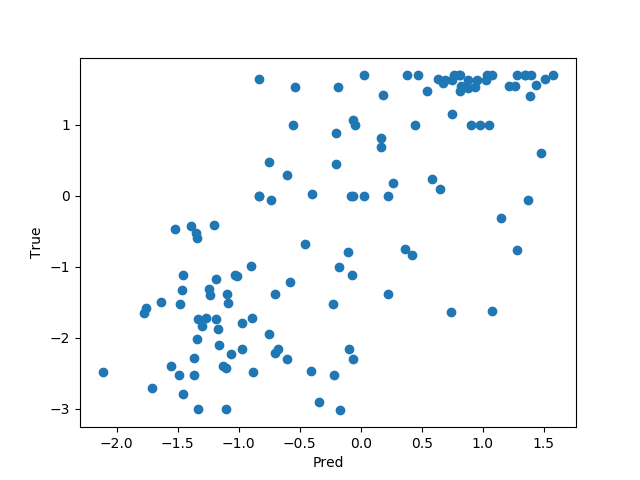

In [24]:
fig, ax = plt.subplots()
ax.scatter(pred, y_test)
ax.set_xlabel("Pred")
ax.set_ylabel("True")

In [4]:
means = []
stds = []
params = []

In [5]:
best_estimators = []
# for i in range(10):
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8)
t0 = time.time()
params = [{
    'n_estimators':np.linspace(90, 100, 11).astype('int'), 
    'criterion':['mse']
}]
reg = GridSearchCV(RFR(), params, cv=5, scoring = 'neg_mean_squared_error', n_jobs = -1, verbose = 10)
reg.fit(X_train, y_train)
best_estimators.append(reg.best_params_['n_estimators'])
means.extend(reg.cv_results_['mean_test_score'])
stds.extend(reg.cv_results_['std_test_score'])
params.extend(reg.cv_results_['params'])
t1 = time.time()
print("%0.2f minutes elapsed" %((t1-t0)/60), flush = True)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  4.9min finished


5.10 minutes elapsed


In [53]:
from collections import Counter
Counter(best_estimators).most_common()

[(97, 3), (95, 2), (92, 2), (98, 1), (93, 1), (96, 1)]

In [48]:
list(zip(means, stds, params))

[(-1.6095179009629001, 0.080044047385298855, 's')]

In [6]:
# best_params.append("Best parameters: {}".format(reg.best_params_))
print("Best parameters:\n\n{}".format(reg.best_params_), flush = True)
# means = reg.cv_results_['mean_test_score']
# stds = reg.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, params):
    print("%0.4f (+/-%0.04f) for %r" % (mean, std * 2, params), flush = True)
y_pred = reg.predict(X_test)
print("r2: {}".format(r2_score(y_test, y_pred)))
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))

Best parameters:

{'criterion': 'mse', 'n_estimators': 95}
-1.5859 (+/-0.4282) for {'n_estimators': array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100]), 'criterion': ['mse']}
-1.5513 (+/-0.4374) for {'criterion': 'mse', 'n_estimators': 90}
-1.5681 (+/-0.4319) for {'criterion': 'mse', 'n_estimators': 91}
-1.5504 (+/-0.3855) for {'criterion': 'mse', 'n_estimators': 92}
-1.5780 (+/-0.4139) for {'criterion': 'mse', 'n_estimators': 93}
-1.5498 (+/-0.3946) for {'criterion': 'mse', 'n_estimators': 94}
-1.5529 (+/-0.4092) for {'criterion': 'mse', 'n_estimators': 95}
-1.5622 (+/-0.4717) for {'criterion': 'mse', 'n_estimators': 96}
-1.5608 (+/-0.4667) for {'criterion': 'mse', 'n_estimators': 97}
-1.5708 (+/-0.4567) for {'criterion': 'mse', 'n_estimators': 98}
-1.6004 (+/-0.3660) for {'criterion': 'mse', 'n_estimators': 99}
r2: 0.4884339366170938
MSE: 1.2198685948805181
